In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\pcos_dataset.csv")

In [11]:
display(df.head())

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [12]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64


In [13]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Age                            int64
BMI                          float64
Menstrual_Irregularity         int64
Testosterone_Level(ng/dL)    float64
Antral_Follicle_Count          int64
PCOS_Diagnosis                 int64
dtype: object


In [14]:
X = df.drop(columns=['PCOS_Diagnosis'])  # Features
y = df['PCOS_Diagnosis']  # Target Variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [19]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (800, 5)
y_train shape: (800,)


In [20]:

y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.885
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       161
           1       0.72      0.67      0.69        39

    accuracy                           0.89       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.88      0.89      0.88       200

Confusion Matrix:
 [[151  10]
 [ 13  26]]


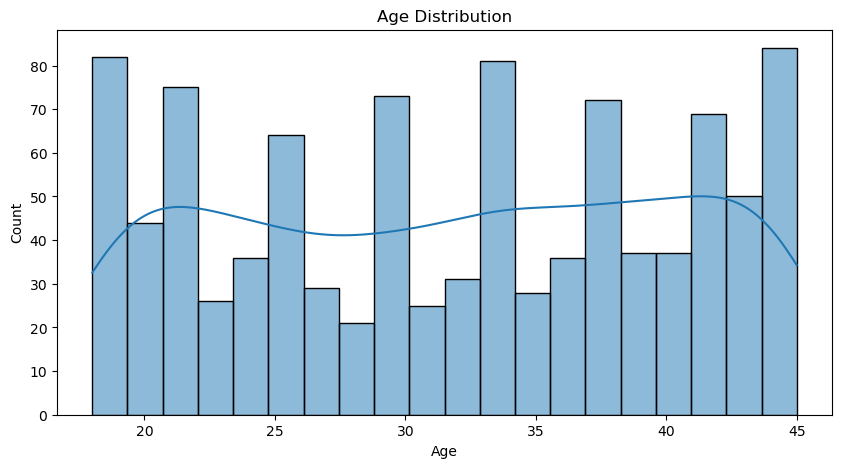

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

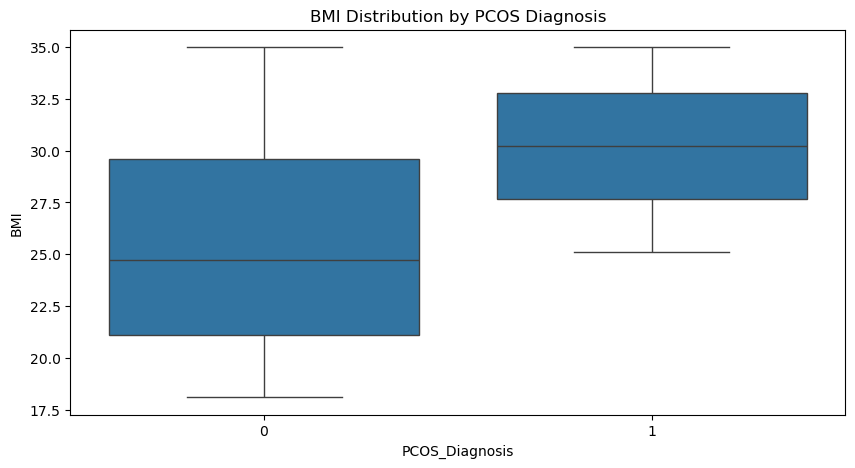

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=df)
plt.title('BMI Distribution by PCOS Diagnosis')
plt.show()

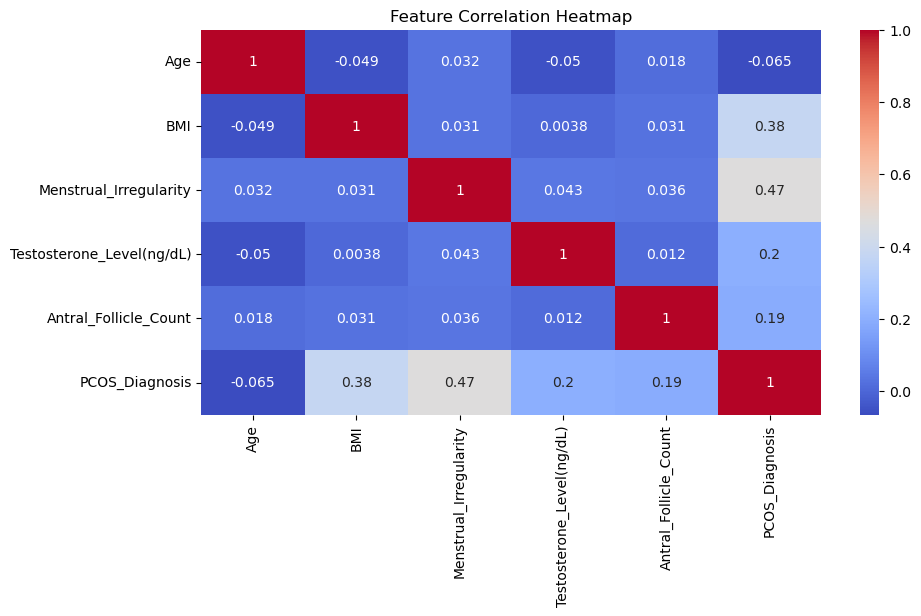

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()